## Digit Recognizer
#### 1. Introduction
This is a 5 layers Sequential Convolutional Neural Network for digits recognition trained on MNIST dataset. I choosed to build it with keras API (Tensorflow backend) which is very intuitive.

In [26]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical 
# convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam, SGD
from keras.preprocessing.image import ImageDataGenerator
# from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

In [27]:
#Load data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
# Input and Target
input_train = train.drop('label', axis=1)
target_train = train['label']

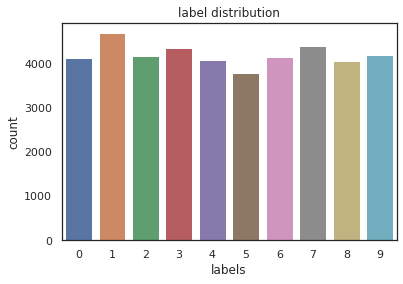

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [29]:
# Label Distribution
fig = sns.countplot(target_train)
plt.xlabel('labels')
plt.ylabel('count')
plt.title('label distribution')
plt.show(fig)
target_train.value_counts()

In [30]:
#Normalization
input_train = input_train/255.0
test = test/255.0

input_train.shape

(42000, 784)

In [31]:
# Reshape
input_train = input_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)
input_train.shape

(42000, 28, 28, 1)

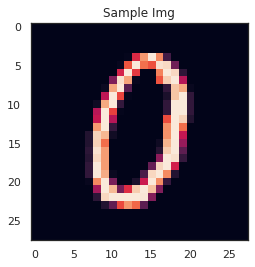

In [32]:
# Sample image
fig = plt.imshow(input_train[5][:,:,0])
plt.title("Sample Img")
plt.show(fig)

In [33]:
# Encoding target
target_train = to_categorical(target_train, num_classes=10)

In [34]:
# Train-Validation Split
X_train, X_val, y_train, y_val = train_test_split(input_train, target_train, test_size=0.1, random_state=42)

In [46]:
# Build model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same',
          activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same',
          activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same',
          activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same',
          activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)         

In [47]:
model.save('digit_recognizer.h5')

In [48]:
# Optimizer
optimizer = SGD(lr=0.001,decay=0.0)

#Compiler
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [49]:
# Data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.12, 
        width_shift_range=0.12,
        height_shift_range=0.12,
        horizontal_flip=False,
        vertical_flip=False)

datagen.fit(X_train)

In [52]:
history = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_val, y_val), verbose=1)
# BATCH_SIZE = 64 
# history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=BATCH_SIZE), epochs=10, validation_data=(X_val, y_train), verbose=2,
# steps_per_epoch=X_train.shape[0] // BATCH_SIZE)

Epoch 1/10
591/591 [==============================] - 241s 407ms/step - loss: 2.2940 - accuracy: 0.1260 - val_loss: 2.2851 - val_accuracy: 0.2424
Epoch 2/10
591/591 [==============================] - 238s 403ms/step - loss: 2.2802 - accuracy: 0.1684 - val_loss: 2.2644 - val_accuracy: 0.2802
Epoch 3/10
591/591 [==============================] - 242s 409ms/step - loss: 2.2505 - accuracy: 0.2014 - val_loss: 2.2036 - val_accuracy: 0.3902
Epoch 4/10
591/591 [==============================] - 239s 404ms/step - loss: 2.1206 - accuracy: 0.2957 - val_loss: 1.8083 - val_accuracy: 0.6593
Epoch 5/10
591/591 [==============================] - 249s 421ms/step - loss: 1.5549 - accuracy: 0.4915 - val_loss: 0.8634 - val_accuracy: 0.7933
Epoch 6/10
591/591 [==============================] - 240s 406ms/step - loss: 1.0270 - accuracy: 0.6599 - val_loss: 0.5574 - val_accuracy: 0.8586
Epoch 7/10
591/591 [==============================] - 236s 399ms/step - loss: 0.7713 - accuracy: 0.7472 - val_loss: 0.4337 -

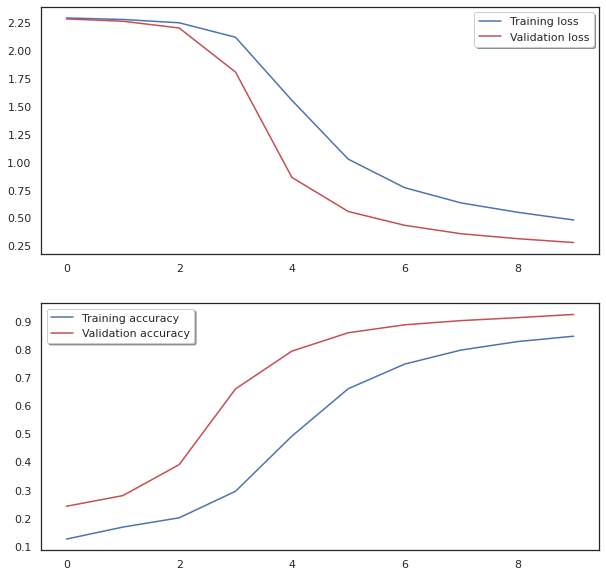

In [56]:
# Evaluate model
fig, ax = plt.subplots(2,1)
fig.set_size_inches(10,10)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

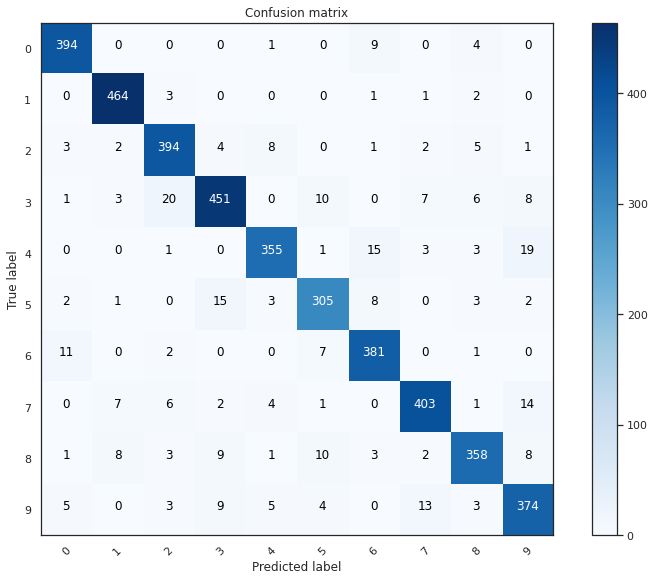

In [61]:
# Look at confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    fig, ax = plt.subplots()
    fig.set_size_inches(11, 8)
    fig = plt.imshow(cm, interpolation='nearest', cmap=cmap)
    # plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred,axis = 1) 
y_actual = np.argmax(y_val,axis = 1) 
confusion_mat = confusion_matrix(y_actual, y_pred_classes) 
plot_confusion_matrix(confusion_mat, classes = range(10))

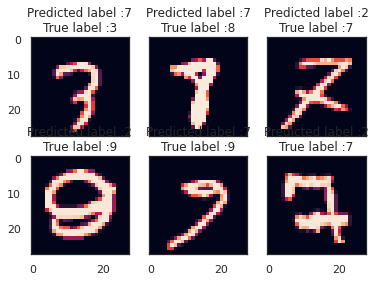

In [67]:
# Dsiplay error results

errors = (y_pred_classes - y_actual != 0)
errors
Y_pred_classes_errors = y_pred_classes[errors]
Y_pred_errors = y_pred[errors]
Y_true_errors = y_actual[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

In [69]:
# Predict results
results = model.predict(test)

# select max value of prediction
results = np.argmax(results, axis=1)
results = pd.Series(results, name='label')

In [74]:
submission = pd.concat([pd.Series(range(1,28001), name='ImageId'), results], axis=1)
submission.to_csv('cnn_prediction.csv', index=False)